<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Datascience-assignments-11-to-15/blob/main/Text%20mining(Elon%20musk%20Tweets).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

In [20]:
path = r"/content/Elon_musk.csv"

In [21]:
data = pd.read_csv(path)

In [22]:
def clean_tweet(tweet):
    # Remove special characters, links, and usernames
    cleaned_tweet = re.sub(r'[^\w\s]', '', tweet)
    cleaned_tweet = re.sub(r'http\S+|www\S+|@\S+', '', cleaned_tweet)
    cleaned_tweet = cleaned_tweet.strip()
    return cleaned_tweet

In [24]:
data['Cleaned Tweet'] = data['Text'].apply(clean_tweet)

In [30]:
patha = r"/content/positive-words.txt"
pathb = r"/content/negative-words.txt"
pathc = r"/content/stop.txt"

In [31]:
with open(patha) as file:
    positive_words = file.read().splitlines()

In [32]:
with open(pathb) as file:
    negative_words = file.read().splitlines()

In [34]:
with open(pathc) as file:
    stop_words = file.read().splitlines()

In [36]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [37]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet.lower())
    words = analysis.words
    sentiment_score = 0

    for word in words:
        if word in positive_words:
            sentiment_score += 1
        elif word in negative_words:
            sentiment_score -= 1

    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment'] = data['Cleaned Tweet'].apply(analyze_sentiment)

In [38]:
sentiment_counts = data['Sentiment'].value_counts()

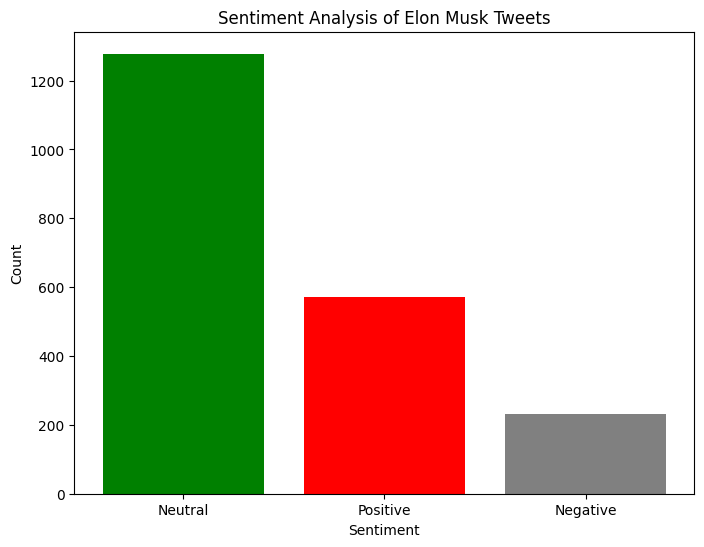

In [39]:
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])
plt.title('Sentiment Analysis of Elon Musk Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()